**Yield Curve Modeling**

A yield curve is a graph that represents the relationship between interest rates (or yields) and the time to maturity of debt securities issued as a government bond

In [7]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


In [9]:
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-tau / lambd)) / (tau / lambd))
    term3 = beta2 * (((1 - np.exp(-tau / lambd)) / (tau / lambd)) - np.exp(-tau / lambd))
    return term1 + term2 + term3

def objective_function(params, maturities, yields):
    beta0, beta1, beta2, lambd = params
    predicted_yields = nelson_siegel(maturities, beta0, beta1, beta2, lambd)
    return np.sum((yields - predicted_yields) ** 2)



In [4]:
# Maturities in years
maturities = np.array([0.25, 0.5, 1, 2, 3, 5, 7, 10, 30])
# Corresponding yields in percent
yields = np.array([6.734, 6.782, 6.800, 6.790, 6.798, 6.825, 6.874, 6.891, 7.202])


In [5]:
# Initial guesses for beta0, beta1, beta2, and lambd
initial_guess = [7, -0.1, 0.1, 1]

# Minimize the objective function
result = minimize(objective_function, initial_guess, args=(maturities, yields), method='L-BFGS-B')

# Extract the fitted parameters
beta0, beta1, beta2, lambd = result.x
print(f"Fitted parameters: beta0={beta0:.4f}, beta1={beta1:.4f}, beta2={beta2:.4f}, lambd={lambd:.4f}")


Fitted parameters: beta0=13.9598, beta1=-7.1972, beta2=-4.8493, lambd=87.7972


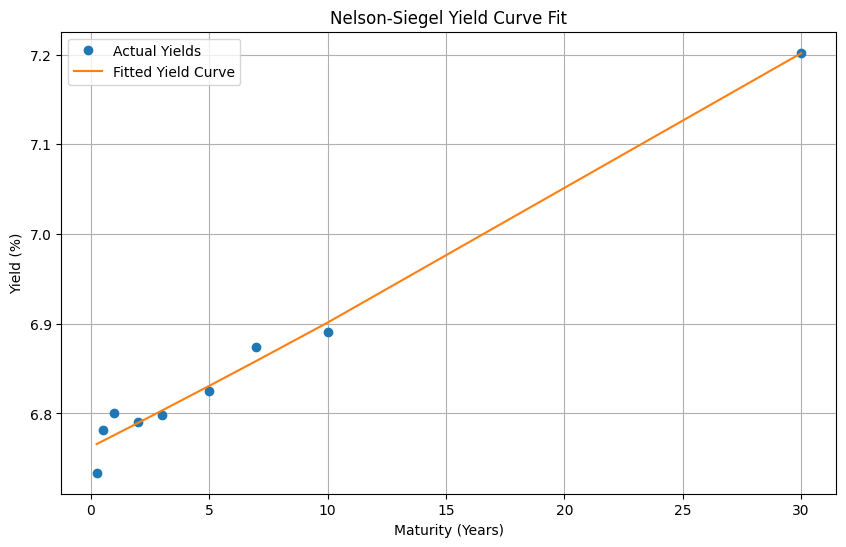

In [6]:
# Generate predicted yields
fitted_yields = nelson_siegel(maturities, beta0, beta1, beta2, lambd)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, 'o', label="Actual Yields")
plt.plot(maturities, fitted_yields, '-', label="Fitted Yield Curve")
plt.title("Nelson-Siegel Yield Curve Fit")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.legend()
plt.grid()
plt.show()


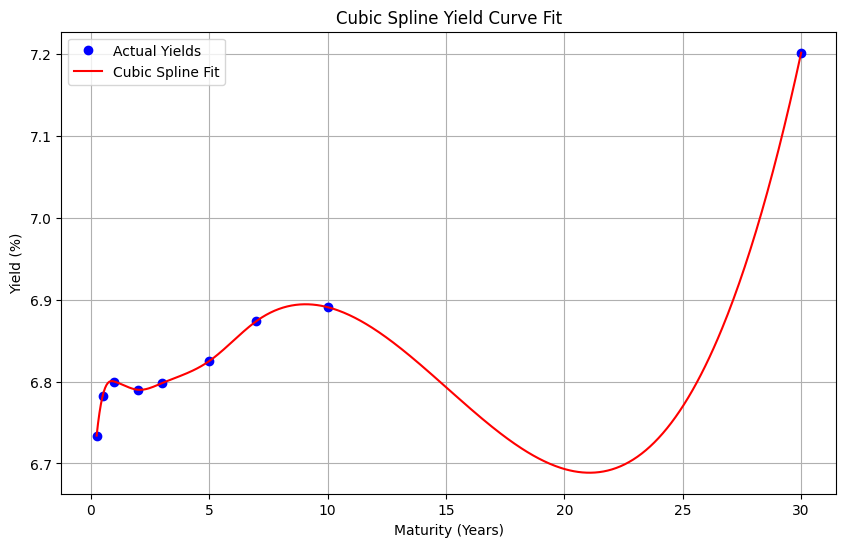

In [8]:
# Fit cubic spline
cs = CubicSpline(maturities, yields)

# Create a dense grid of maturities for smooth plotting
dense_maturities = np.linspace(min(maturities), max(maturities), 500)
fitted_yields = cs(dense_maturities)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, 'o', label="Actual Yields", color='blue')
plt.plot(dense_maturities, fitted_yields, '-', label="Cubic Spline Fit", color='red')
plt.title("Cubic Spline Yield Curve Fit")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.legend()
plt.grid()
plt.show()



The resulting yield curve is as shown above. The blue dots represent the actual yields, while the red curve shows the smooth cubic spline interpolation

**e. Compare the models in terms of 1) fit and 2) interpretation**

**Fit**

The fit quality can be evaluated visually and quantitatively by comparing how well each model replicates the given data points and their smoothness for extrapolated maturities.
Cubic spline provides exact fit to the data points because it interpolates them while Nelson-Siegel generates a smooth and parsimonous yield curve that balances fitting accuracy and interpretability.

As much as, Cubic spline provide a perfect fit for the data, it overfits even if the data has noise. On the other hand, a shortcoming of Nelson-Niegel, seems to be generalizing, although it may not perfectly fit the data especially, in the case of irregularities in the data.

**interpretation**

Cubic spline yield curve is purposefully for mathematical interpretation, uses piecewise cubic polynomials to fit the data, yet do not offer any insights into bond market dynamics. For Nelson-Niegel, the parameters **$(\beta_0, \beta_1, \beta_2, \text{and } \lambda)$** where:


*   $β
0
​$
 : Represents the long-term component of the yield curve.
* $𝛽
1$
​
 : Captures the slope of the yield curve - short-term against long-term rates.
* $𝛽
2$
​
 : Describes the curvature, projecting the medium-term dynamics.
* $𝜆$: Controls the rate of decay for the slope and curvature components.



**g. The Ethics of smoothing data**

The ethics of smoothing data, including using models like the Nelson-Siegel framework to smooth the yield curve, depend on intent, transparency, and impact. The Nelson-Siegel model in many cases is used for analyzing yield curves to simplify and interpret interest rate trends. It provides a structured, parsimonious representation of the yield curve without overfitting the data. It becomes unethical when it is used to intentionally hide critical information, such as market irregularities or risks.